In [15]:
%reload_ext autoreload

In [1]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

# Setting up dataset

In [4]:
from kerasUtils import *
#train, test = splitDataSet("/home/alubitz/Downloads/balancedCleanedDataSet_5GB", 0.15, 42)

#train, test = splitDataSet("/media/al/bcaed2d1-c378-44e2-a581-fae772b468db/data/balancedCleanedDataSet_5GB", 0.15, 42) #small test set 1 to 1

#train, test = splitDataSet("/media/al/0fd62943-862a-40b9-a4db-fe92a880b732/balancedCleandDataSet", 0.15, 42) # 1 to 1 Dataset

train, test = splitDataSet("/media/al/0fd62943-862a-40b9-a4db-fe92a880b732/faceFeaturesDataset", 0.15, 42) # 1 to 1 Dataset

#train, test = splitDataSet("/media/al/bcaed2d1-c378-44e2-a581-fae772b468db/data/balancedCleandDataSet", 0.15, 42) # 2 to 1 Dataset

#train, test = splitDataSet("/media/al/0fd62943-862a-40b9-a4db-fe92a880b732/lipImageDataset", 0.15, 42) # 2 to 1 Dataset

print('Loaded {} training samples and {} validation samples'.format(len(train), len(test)))


Loaded 22144 positive samples and 22145 negative samples
Loaded 37647 training samples and 6642 validation samples


In [5]:
from kerasUtils import *
import datetime
batch_size = 64
imageSize = None#(96, 96)
grayscale = False
num_steps = None 
one_hot = False
train_samples= None 
valid_samples= None
normalize = True
print_freq=None

(train_x, train_y), validation_data = genData(train, 
                                              test,train_samples=train_samples, 
                                              valid_samples= valid_samples, 
                                              batch_size = batch_size, 
                                              imageSize = imageSize,
                                              grayscale = grayscale, 
                                              num_steps=num_steps, 
                                              one_hot=one_hot,
                                              print_freq=print_freq, 
                                              normalize=normalize
                                             )



train_x_shape: (37647, 38, 68, 2)
train_y_shape: (37647,)
valid_x_shape: (6642, 38, 68, 2)
valid_y_shape: (6642,)
dtype: float64
1.705660231411457 GB RAM is needed for training and validation data
 Training data: 100.00%	ETA: 0.022285749483759585s
 Validation data: 100.00%ETA: 694.195206254566ss


In [ ]:
from kerasUtils import *
from plotUtils import *
import keras
from keras import callbacks
input_shape = train_x[0].shape
print(input_shape)
epochs = 200

# define callbacks
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.2,
                      patience=3, min_lr=0.001, cooldown=2, verbose=1)
earlyStopping = callbacks.EarlyStopping(monitor='val_acc', patience=9, restore_best_weights=True, verbose=1)
checkpoint = callbacks.ModelCheckpoint("faceFeatureModel.h5", monitor='val_acc', save_best_only=True)
callbacks = [reduce_lr, earlyStopping, checkpoint]

model, modelName = Models.buildFeatureLSTM(input_shape=input_shape)
history = model.fit(x=train_x, y=train_y, validation_data=validation_data, batch_size=batch_size, epochs=epochs, callbacks=callbacks)
Models.saveHistory(history.history, "../trainingHistories/FeatureLSTMwithCallbacks_{}_{}_{}.pickle".format(batch_size, input_shape, datetime.datetime.now()))
visualizeHistory(history.history)

The following GPU devices are available: /device:GPU:0


In [11]:
model.save("FaceFeaturesModel.h5")

The following GPU devices are available: /device:GPU:0


[autoreload of kerasUtils failed: Traceback (most recent call last):
  File "/home/al/anaconda3/envs/MA/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/al/anaconda3/envs/MA/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/home/al/anaconda3/envs/MA/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/al/anaconda3/envs/MA/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/home/al/anaconda3/envs/MA/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/home/al/anaconda3/envs/MA/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update

# Train all BaselineModels(Mobilnet, densenet and vggFace)

(96, 96, 3)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 37817 samples, validate on 6672 samples
Epoch 1/200
37817/37817 [==============================] - 42s 1ms/step - loss: 0.7110 - acc: 0.5115 - val_loss: 0.7458 - val_acc: 0.5211
Epoch 2/200
37817/37817 [==============================] - 38s 1ms/step - loss: 0.7046 - acc: 0.5155 - val_loss: 0.7254 - val_acc: 0.5082
Epoch 3/200
37817/37817 [==============================] - 38s 1ms/step - loss: 0.7009 - acc: 0.5201 - val_loss: 0.7699 - val_acc: 0.5172
Epoch 4/200
37817/37817 [==============================] - 38s 1ms/step - loss: 0.6952 - acc: 0.5382 - val_loss: 0.7113 - val_acc: 0.5202
Epoch 5/200
37817/37817 [==============================] - 38s 1ms/step - 

Epoch 109/200
37817/37817 [==============================] - 38s 1ms/step - loss: 0.0191 - acc: 0.9934 - val_loss: 1.7495 - val_acc: 0.6784
Epoch 110/200
37817/37817 [==============================] - 38s 999us/step - loss: 0.0298 - acc: 0.9892 - val_loss: 1.7918 - val_acc: 0.6773
Epoch 111/200
37817/37817 [==============================] - 38s 999us/step - loss: 0.0274 - acc: 0.9905 - val_loss: 1.7681 - val_acc: 0.6734
Epoch 112/200
37817/37817 [==============================] - 38s 999us/step - loss: 0.0254 - acc: 0.9910 - val_loss: 1.8037 - val_acc: 0.6787
Epoch 113/200
37817/37817 [==============================] - 38s 999us/step - loss: 0.0190 - acc: 0.9933 - val_loss: 1.7556 - val_acc: 0.6854
Epoch 114/200
37817/37817 [==============================] - 38s 999us/step - loss: 0.0200 - acc: 0.9928 - val_loss: 1.8047 - val_acc: 0.6775
Epoch 115/200
37817/37817 [==============================] - 38s 1000us/step - loss: 0.0195 - acc: 0.9937 - val_loss: 1.8397 - val_acc: 0.6793
Epoch 1

Epoch 167/200
37817/37817 [==============================] - 38s 1ms/step - loss: 0.0132 - acc: 0.9952 - val_loss: 1.9327 - val_acc: 0.6847
Epoch 168/200
37817/37817 [==============================] - 38s 1ms/step - loss: 0.0113 - acc: 0.9959 - val_loss: 1.9217 - val_acc: 0.6784
Epoch 169/200
37817/37817 [==============================] - 38s 999us/step - loss: 0.0113 - acc: 0.9961 - val_loss: 1.9488 - val_acc: 0.6808
Epoch 170/200
37817/37817 [==============================] - 38s 1ms/step - loss: 0.0099 - acc: 0.9965 - val_loss: 1.9141 - val_acc: 0.6853
Epoch 171/200
37817/37817 [==============================] - 38s 999us/step - loss: 0.0089 - acc: 0.9973 - val_loss: 1.9607 - val_acc: 0.6785
Epoch 172/200
37817/37817 [==============================] - 38s 1ms/step - loss: 0.0108 - acc: 0.9964 - val_loss: 1.9860 - val_acc: 0.6820
Epoch 173/200
37817/37817 [==============================] - 38s 999us/step - loss: 0.0116 - acc: 0.9963 - val_loss: 1.9582 - val_acc: 0.6827
Epoch 174/200


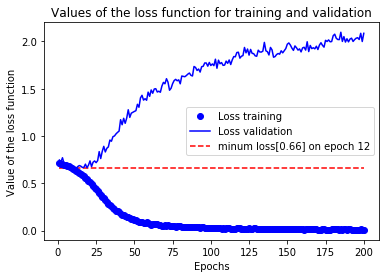

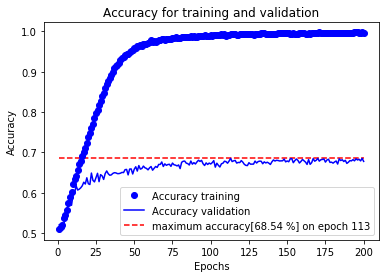

In [5]:
from kerasUtils import *
from plotUtils import *
import keras
input_shape = train_x[0].shape
print(input_shape)
epochs = 200

model, modelName = Models.buildBaselineModel('mobileNetV1', input_shape=input_shape, weights=None, classes=2)
history = model.fit(x=train_x, y=train_y, validation_data=validation_data, batch_size=batch_size, epochs=epochs)
Models.saveHistory(history.history, "../trainingHistories/FINALBASELINE{}_{}_{}_{}.pickle".format(modelName, batch_size, input_shape, datetime.datetime.now()))
visualizeHistory(history.history)
model.save_weights('../models/mobileNetBaselineWeights.h5')


# Train BaseLineModel

In [5]:
from kerasUtils import *
from plotUtils import *
import keras
input_shape = train_x[0].shape
print(input_shape)
epochs = 200
model, modelName = Models.buildBaselineModel('mobileNet', input_shape=input_shape, weights=None, classes=2)

history = model.fit(x=train_x, y=train_y, validation_data=validation_data, batch_size=batch_size, epochs=epochs)

Models.saveHistory(history.history, "../trainingHistories/{}_{}_{}_{}.pickle".format(modelName, batch_size, input_shape, datetime.datetime.now()))
visualizeHistory(history.history)
model.save_weights('../models/mobileNetBaselineWeights.h5')

(96, 96, 3)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 37817 samples, validate on 6672 samples
Epoch 1/200
 4032/37817 [==>...........................] - ETA: 10:24 - loss: 0.7269 - acc: 0.4960

KeyboardInterrupt: 

# Train TimeDistributed

In [ ]:
from kerasUtils import *
from plotUtils import *
import keras

train_x_parted = train_x[:, :8]
train_y_parted = train_y
validation_data_parted = (validation)

input_shape = train_x_parted[0].shape
print(input_shape)
epochs = 200
model, modelName = Models.buildTimedistributed('mobileNet', 
                                               input_shape=input_shape, 
                                               #lstm_dims = 128, 
                                               #num_lstm_layers= 4, 
                                               #num_dense_layers=0,
                                               #dense_dims=512,
                                               #base_model_weights='../models/mobileNetBaselineWeights.h5'
                                               )

history = model.fit(x=train_x_parted, y=train_y_parted, validation_data=validation_data_parted, batch_size=batch_size, epochs=epochs)
num_samples = 'all' if not train_samples else train_samples
Models.saveHistory(history.history, "../trainingHistories/{}_{}_{}_{}_{}.pickle".format(num_samples, modelName, batch_size, input_shape, datetime.datetime.now()))
visualizeHistory(history.history)

#---------------------------------------

input_shape = train_x[0].shape
print(input_shape)
epochs = 200
model, modelName = Models.buildTimedistributed('mobileNet', 
                                               input_shape=input_shape, 
                                               #lstm_dims = 128, 
                                               #num_lstm_layers= 4, 
                                               #num_dense_layers=0,
                                               #dense_dims=512,
                                               #base_model_weights='../models/mobileNetBaselineWeights.h5'
                                               )

history = model.fit(x=train_x, y=train_y, validation_data=validation_data, batch_size=batch_size, epochs=epochs)
num_samples = 'all' if not train_samples else train_samples
Models.saveHistory(history.history, "../trainingHistories/{}_{}_{}_{}_{}.pickle".format(num_samples, modelName, batch_size, input_shape, datetime.datetime.now()))
visualizeHistory(history.history)

# BaseLine with selfmade top

Train on 850 samples, validate on 150 samples
Epoch 1/20
850/850 [==============================] - 11s 13ms/step - loss: 3.5807 - acc: 0.5553 - val_loss: 3.0482 - val_acc: 0.6467
Epoch 2/20
850/850 [==============================] - 1s 1ms/step - loss: 1.1165 - acc: 0.6071 - val_loss: 0.8806 - val_acc: 0.6000
Epoch 3/20
850/850 [==============================] - 1s 1ms/step - loss: 1.0529 - acc: 0.6094 - val_loss: 0.7535 - val_acc: 0.6533
Epoch 4/20
850/850 [==============================] - 1s 1ms/step - loss: 1.0248 - acc: 0.5976 - val_loss: 0.8418 - val_acc: 0.6467
Epoch 5/20
850/850 [==============================] - 1s 1ms/step - loss: 0.9422 - acc: 0.6459 - val_loss: 7.3988 - val_acc: 0.3867
Epoch 6/20
850/850 [==============================] - 1s 1ms/step - loss: 0.9483 - acc: 0.6141 - val_loss: 4.4194 - val_acc: 0.5600
Epoch 7/20
850/850 [==============================] - 1s 1ms/step - loss: 0.7944 - acc: 0.6647 - val_loss: 2.5314 - val_acc: 0.6267
Epoch 8/20
850/850 [========

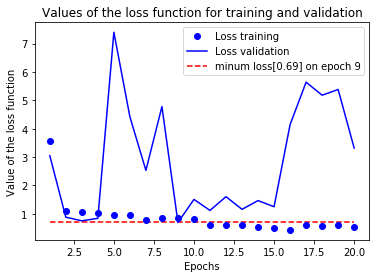

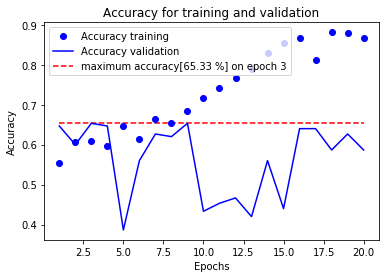

In [23]:
from keras.applications.mobilenet import MobileNet
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Dropout, Activation, GlobalAveragePooling2D
from plotUtils import *


input_shape = train_x[0].shape
model = Sequential()
_base_model = MobileNet(weights=None, include_top=False, input_shape=input_shape)
model.add(_base_model)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", 
                      optimizer='rmsprop',
                      metrics=["accuracy"])
modelName = "MobileNetFineTuned"


epochs = 20
callbacks = []
history = model.fit(x=train_x, y=train_y, validation_data=validation_data, batch_size=batch_size, epochs=epochs, callbacks=callbacks)
visualizeHistory(history.history)

# Train all TimeDistributed

(2, 96, 96, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 2, 9216)           3228864   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                1183872   
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 4,430,273
Trainable params: 4,408,321
Non-trainable params: 21,952
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 37817 samples, validate on 6672 samples
Epoch 1/200
378

Epoch 109/200
37817/37817 [==============================] - 78s 2ms/step - loss: 0.0281 - acc: 0.9900 - val_loss: 1.4278 - val_acc: 0.6924
Epoch 110/200
37817/37817 [==============================] - 76s 2ms/step - loss: 0.0278 - acc: 0.9902 - val_loss: 1.4127 - val_acc: 0.7086
Epoch 111/200
37817/37817 [==============================] - 76s 2ms/step - loss: 0.0249 - acc: 0.9914 - val_loss: 1.4949 - val_acc: 0.7034
Epoch 112/200
37817/37817 [==============================] - 76s 2ms/step - loss: 0.0264 - acc: 0.9911 - val_loss: 1.4003 - val_acc: 0.7086
Epoch 113/200
37817/37817 [==============================] - 75s 2ms/step - loss: 0.0267 - acc: 0.9909 - val_loss: 1.4285 - val_acc: 0.7110
Epoch 114/200
37817/37817 [==============================] - 76s 2ms/step - loss: 0.0283 - acc: 0.9907 - val_loss: 1.4412 - val_acc: 0.7031
Epoch 115/200
37817/37817 [==============================] - 75s 2ms/step - loss: 0.0255 - acc: 0.9915 - val_loss: 1.4152 - val_acc: 0.7074
Epoch 116/200
37817/

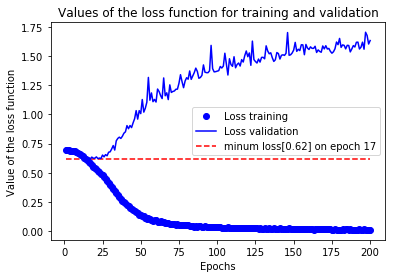

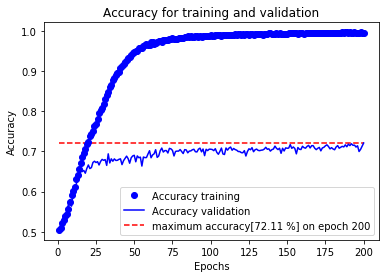

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_2 (TimeDist (None, 2, 11520)          2257984   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                1478784   
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 3,754,305
Trainable params: 3,720,129
Non-trainable params: 34,176
_________________________________________________________________
Train on 37817 samples, validate on 6672 samples
Epoch 1/200
37817/37817 [==============================] - 97s 3ms/step - loss

Epoch 111/200
37817/37817 [==============================] - 91s 2ms/step - loss: 0.0207 - acc: 0.9926 - val_loss: 1.7098 - val_acc: 0.6966
Epoch 112/200
37817/37817 [==============================] - 92s 2ms/step - loss: 0.0212 - acc: 0.9927 - val_loss: 1.6004 - val_acc: 0.6983
Epoch 113/200
37817/37817 [==============================] - 91s 2ms/step - loss: 0.0198 - acc: 0.9935 - val_loss: 1.6740 - val_acc: 0.6936
Epoch 114/200
37817/37817 [==============================] - 91s 2ms/step - loss: 0.0177 - acc: 0.9941 - val_loss: 1.5970 - val_acc: 0.6998
Epoch 115/200
37817/37817 [==============================] - 91s 2ms/step - loss: 0.0190 - acc: 0.9928 - val_loss: 1.8011 - val_acc: 0.6874
Epoch 116/200
37817/37817 [==============================] - 91s 2ms/step - loss: 0.0249 - acc: 0.9914 - val_loss: 1.5838 - val_acc: 0.6945
Epoch 117/200
37817/37817 [==============================] - 91s 2ms/step - loss: 0.0164 - acc: 0.9944 - val_loss: 1.6029 - val_acc: 0.7010
Epoch 118/200
37817/

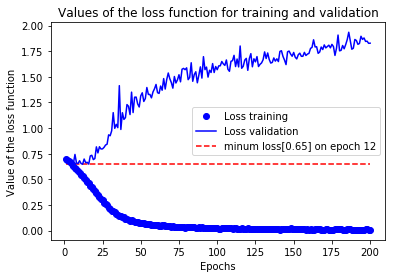

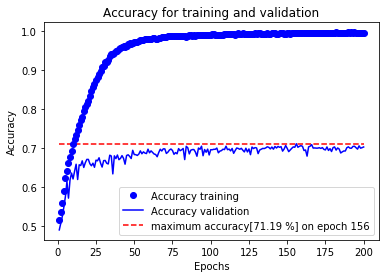

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_3 (TimeDist (None, 2, 9216)           7037504   
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                1183872   
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 8,238,913
Trainable params: 8,155,201
Non-trainable params: 83,712
_________________________________________________________________
Train on 37817 samples, validate on 6672 samples
Epoch 1/200
37817/37817 [==============================] - 184s 5ms/step - los

37817/37817 [==============================] - 164s 4ms/step - loss: 0.0265 - acc: 0.9911 - val_loss: 1.2647 - val_acc: 0.7401
Epoch 53/200
37817/37817 [==============================] - 164s 4ms/step - loss: 0.0217 - acc: 0.9932 - val_loss: 1.2042 - val_acc: 0.7376
Epoch 54/200
37817/37817 [==============================] - 164s 4ms/step - loss: 0.0251 - acc: 0.9912 - val_loss: 1.2817 - val_acc: 0.7454
Epoch 55/200
37817/37817 [==============================] - 164s 4ms/step - loss: 0.0198 - acc: 0.9929 - val_loss: 1.2582 - val_acc: 0.7305
Epoch 56/200
37817/37817 [==============================] - 164s 4ms/step - loss: 0.0214 - acc: 0.9932 - val_loss: 1.2934 - val_acc: 0.7379
Epoch 57/200
37817/37817 [==============================] - 164s 4ms/step - loss: 0.0308 - acc: 0.9895 - val_loss: 1.3710 - val_acc: 0.7131
Epoch 58/200
37817/37817 [==============================] - 164s 4ms/step - loss: 0.0247 - acc: 0.9914 - val_loss: 1.3929 - val_acc: 0.7248
Epoch 59/200
37817/37817 [=======

37817/37817 [==============================] - 164s 4ms/step - loss: 0.0052 - acc: 0.9982 - val_loss: 1.5405 - val_acc: 0.7448
Epoch 169/200
37817/37817 [==============================] - 164s 4ms/step - loss: 0.0039 - acc: 0.9988 - val_loss: 1.5241 - val_acc: 0.7534
Epoch 170/200
37817/37817 [==============================] - 164s 4ms/step - loss: 0.0038 - acc: 0.9987 - val_loss: 1.5658 - val_acc: 0.7499
Epoch 171/200
37817/37817 [==============================] - 164s 4ms/step - loss: 0.0067 - acc: 0.9978 - val_loss: 1.6380 - val_acc: 0.7343
Epoch 172/200
37817/37817 [==============================] - 164s 4ms/step - loss: 0.0048 - acc: 0.9984 - val_loss: 1.6264 - val_acc: 0.7440
Epoch 173/200
37817/37817 [==============================] - 164s 4ms/step - loss: 0.0032 - acc: 0.9991 - val_loss: 1.6375 - val_acc: 0.7427
Epoch 174/200
37817/37817 [==============================] - 164s 4ms/step - loss: 0.0052 - acc: 0.9983 - val_loss: 1.5661 - val_acc: 0.7481
Epoch 175/200
37817/37817 [

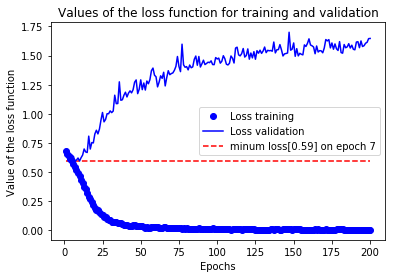

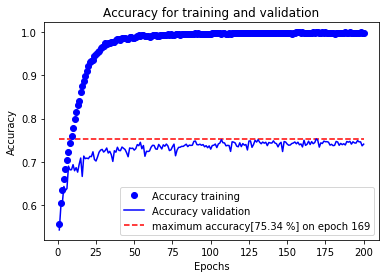

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, 2, 4608)           14714688  
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                594048    
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
dense_7 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 15,326,273
Trainable params: 15,326,209
Non-trainable params: 64
_________________________________________________________________
Train on 37817 samples, validate on 6672 samples
Epoch 1/200
37817/37817 [==============================] - 168s 4ms/step - loss:

37817/37817 [==============================] - 158s 4ms/step - loss: 0.0134 - acc: 0.9951 - val_loss: 1.7582 - val_acc: 0.7293
Epoch 53/200
37817/37817 [==============================] - 158s 4ms/step - loss: 0.0094 - acc: 0.9969 - val_loss: 1.5854 - val_acc: 0.7316
Epoch 54/200
37817/37817 [==============================] - 158s 4ms/step - loss: 0.0083 - acc: 0.9971 - val_loss: 1.5971 - val_acc: 0.7248
Epoch 55/200
37817/37817 [==============================] - 158s 4ms/step - loss: 0.0051 - acc: 0.9984 - val_loss: 1.4414 - val_acc: 0.7397
Epoch 56/200
37817/37817 [==============================] - 158s 4ms/step - loss: 0.0015 - acc: 0.9996 - val_loss: 1.4253 - val_acc: 0.7338
Epoch 57/200
37817/37817 [==============================] - 157s 4ms/step - loss: 0.0015 - acc: 0.9997 - val_loss: 1.5678 - val_acc: 0.7391
Epoch 58/200
37817/37817 [==============================] - 158s 4ms/step - loss: 5.0010e-04 - acc: 0.9999 - val_loss: 1.5831 - val_acc: 0.7352
Epoch 59/200
37817/37817 [===

37817/37817 [==============================] - 158s 4ms/step - loss: 2.4850e-05 - acc: 1.0000 - val_loss: 1.6984 - val_acc: 0.7392
Epoch 110/200
37817/37817 [==============================] - 157s 4ms/step - loss: 2.6628e-05 - acc: 1.0000 - val_loss: 1.6998 - val_acc: 0.7386
Epoch 111/200
37817/37817 [==============================] - 158s 4ms/step - loss: 2.3657e-05 - acc: 1.0000 - val_loss: 1.7038 - val_acc: 0.7388
Epoch 112/200
37817/37817 [==============================] - 157s 4ms/step - loss: 2.2609e-05 - acc: 1.0000 - val_loss: 1.7021 - val_acc: 0.7388
Epoch 113/200
37817/37817 [==============================] - 158s 4ms/step - loss: 2.2960e-05 - acc: 1.0000 - val_loss: 1.7030 - val_acc: 0.7391
Epoch 114/200
37817/37817 [==============================] - 157s 4ms/step - loss: 2.0877e-05 - acc: 1.0000 - val_loss: 1.7070 - val_acc: 0.7395
Epoch 115/200
37817/37817 [==============================] - 157s 4ms/step - loss: 2.3394e-05 - acc: 1.0000 - val_loss: 1.7116 - val_acc: 0.7389

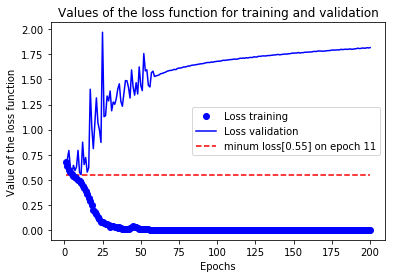

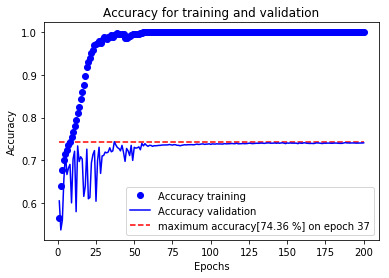

In [7]:
from kerasUtils import *
from plotUtils import *
import keras
input_shape = train_x[0].shape
print(input_shape)
epochs = 200
model, modelName = Models.buildTimedistributed('mobileNet', 
                                               input_shape=input_shape, 
                                               #lstm_dims = 128, 
                                               #num_lstm_layers= 4, 
                                               #num_dense_layers=0,
                                               #dense_dims=512
                                               )

history = model.fit(x=train_x, y=train_y, validation_data=validation_data, batch_size=batch_size, epochs=epochs)
num_samples = 'all' if not train_samples else train_samples
Models.saveHistory(history.history, "../trainingHistories/{}_{}_{}_{}_{}.pickle".format(num_samples, modelName, batch_size, input_shape, datetime.datetime.now()))
visualizeHistory(history.history)


model, modelName = Models.buildTimedistributed('mobileNetv2', 
                                               input_shape=input_shape, 
                                               #lstm_dims = 128, 
                                               #num_lstm_layers= 4, 
                                               #num_dense_layers=0,
                                               #dense_dims=512
                                               )

history = model.fit(x=train_x, y=train_y, validation_data=validation_data, batch_size=batch_size, epochs=epochs)
num_samples = 'all' if not train_samples else train_samples
Models.saveHistory(history.history, "../trainingHistories/{}_{}_{}_{}_{}.pickle".format(num_samples, modelName, batch_size, input_shape, datetime.datetime.now()))
visualizeHistory(history.history)


model, modelName = Models.buildTimedistributed('denseNet', 
                                               input_shape=input_shape, 
                                               #lstm_dims = 128, 
                                               #num_lstm_layers= 4, 
                                               #num_dense_layers=0,
                                               #dense_dims=512
                                               )

history = model.fit(x=train_x, y=train_y, validation_data=validation_data, batch_size=batch_size, epochs=epochs)
num_samples = 'all' if not train_samples else train_samples
Models.saveHistory(history.history, "../trainingHistories/{}_{}_{}_{}_{}.pickle".format(num_samples, modelName, batch_size, input_shape, datetime.datetime.now()))
visualizeHistory(history.history)


model, modelName = Models.buildTimedistributed('vggface', 
                                               input_shape=input_shape, 
                                               #lstm_dims = 128, 
                                               #num_lstm_layers= 4, 
                                               #num_dense_layers=0,
                                               #dense_dims=512
                                               )

history = model.fit(x=train_x, y=train_y, validation_data=validation_data, batch_size=batch_size, epochs=epochs)
num_samples = 'all' if not train_samples else train_samples
Models.saveHistory(history.history, "../trainingHistories/{}_{}_{}_{}_{}.pickle".format(num_samples, modelName, batch_size, input_shape, datetime.datetime.now()))
visualizeHistory(history.history)